In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import numpy as np
import os
from scipy.signal import argrelextrema
from detecta import detect_peaks

from scipy import interpolate


In [ ]:
# df_snhn=pd.read_csv("results_sheet/song_hn.csv")
df_snhn=pd.read_csv("results_sheet/mod_CNN_05_1_100_song_hn.csv")
df_snhn=df_snhn.sort_values(by=["compression"])


# df_mean_wt=pd.read_csv("results_sheet/py_mean_weighted.csv")
df_mean_wt=pd.read_csv("results_sheet/2threshold_mean_wts.csv")
df_mean_wt=df_mean_wt.sort_values(by=["compression"])

df_mean_wt_60=pd.read_csv("results_sheet/2threshold_mean_wts_60.csv")
df_mean_wt_60=df_mean_wt_60.sort_values(by=["compression"])

df_mean_wt_70=pd.read_csv("results_sheet/2threshold_mean_wts_70.csv")
df_mean_wt_70=df_mean_wt_70.sort_values(by=["compression"])


df_mean_wt_80=pd.read_csv("results_sheet/2threshold_mean_wts_80.csv")
df_mean_wt_80=df_mean_wt_80.sort_values(by=["compression"])


df_mean_wt_90=pd.read_csv("results_sheet/2threshold_mean_wts_90.csv")
df_mean_wt_90=df_mean_wt_90.sort_values(by=["compression"])


df_mean_wt_95=pd.read_csv("results_sheet/2threshold_mean_wts_95.csv")
df_mean_wt_95=df_mean_wt_95.sort_values(by=["compression"])


print(df_mean_wt.head())

In [ ]:
df_mean_wt_95

In [ ]:
fig = go.Figure()
xs=df_snhn["compression"]
ys=df_snhn["top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="Standard Pruning"))

# xs=df_mean_wt["compression"]
# ys=df_mean_wt["top_1"]
# fig.add_trace(go.Scatter(x=xs, y=ys,
#                 mode='lines+markers',
#                 name="MeanWt Method"))




# xs=df_mean_wt_60["compression"]
# ys=df_mean_wt_60["top_1"]
# fig.add_trace(go.Scatter(x=xs, y=ys,
#                 mode='lines+markers',
#                 name="MeanWt Method_60"))



# xs=df_mean_wt_70["compression"]
# ys=df_mean_wt_70["top_1"]
# fig.add_trace(go.Scatter(x=xs, y=ys,
#                 mode='lines+markers',
#                 name="MeanWt Method_70"))



# xs=df_mean_wt_80["compression"]
# ys=df_mean_wt_80["top_1"]
# fig.add_trace(go.Scatter(x=xs, y=ys,
#                 mode='lines+markers',
#                 name="MeanWt Method_80"))



# xs=df_mean_wt_90["compression"]
# ys=df_mean_wt_90["top_1"]
# fig.add_trace(go.Scatter(x=xs, y=ys,
#                 mode='lines+markers',
#                 name="MeanWt Method_90"))



xs=df_mean_wt_95["compression"]
ys=df_mean_wt_95["top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="Evolutionary Pruning"))


fig.update_layout(
    title="Comparison for CIFAR10",
    xaxis_title="Compression",
    yaxis_title="Accuracy_top1",
    legend_title="Legend Title",
#     font=dict(
#         family="Courier New, monospace",
#         size=18,
#         color="RebeccaPurple"
#     )
)

fig.show()

### plot for paper

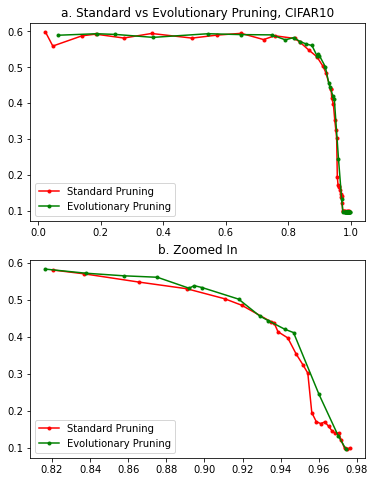

In [2]:
df_snhn=pd.read_csv("results_sheet/mod_CNN_05_1_100_song_hn.csv")
df_snhn=df_snhn.sort_values(by=["compression"])


df_mean_wt_95=pd.read_csv("results_sheet/2threshold_mean_wts_95.csv")
df_mean_wt_95=df_mean_wt_95.sort_values(by=["compression"])



fig, axs = plt.subplots(2, 1,figsize=(6, 8))

xs=df_snhn["compression"].values
ys=df_snhn["top_1"].values
axs[0].plot(xs,ys,marker='.',color="red",label="Standard Pruning")


xs=df_mean_wt_95["compression"].values
ys=df_mean_wt_95["top_1"].values
axs[0].plot(xs,ys,marker='.',color="green", label = "Evolutionary Pruning")
axs[0].set_title("a. Standard vs Evolutionary Pruning, CIFAR10")
axs[0].legend()


xs=df_snhn["compression"].values
ys=df_snhn["top_1"].values

left=0.8
right=0.98
ys=ys[xs>left]
xs=xs[xs>left]

ys=ys[xs<right]
xs=xs[xs<right]

axs[1].plot(xs,ys,marker='.',color="red",label="Standard Pruning")


xs=df_mean_wt_95["compression"].values
ys=df_mean_wt_95["top_1"].values

ys=ys[xs>left]
xs=xs[xs>left]

ys=ys[xs<right]
xs=xs[xs<right]


axs[1].plot(xs,ys,marker='.',color="green",label = "Evolutionary Pruning")

axs[1].set_title("b. Zoomed In")
axs[1].legend()



fig.savefig("images/Complete_Zoomed_StandardvEvolCIFAR10.svg")
fig.savefig("images/Complete_Zoomed_StandardvEvolCIFAR10.png",facecolor="white", edgecolor='none')
fig.show()

In [ ]:
print(df_bezier_on_mean.range_params.unique())
print(df_bezier_on_mean.upscale.unique())

### Can we do cubic spline interpolation and calculate the area

In [ ]:
# https://docs.scipy.org/doc/scipy/tutorial/interpolate.html
# https://stackoverflow.com/questions/58027326/calculating-area-under-curve-from-x-y-coordinates
    

df_snhn=pd.read_csv("results_sheet/mod_CNN_05_1_100_song_hn.csv")
df_snhn=df_snhn.sort_values(by=["compression"])



df_mean_wt_90=pd.read_csv("results_sheet/2threshold_mean_wts_95.csv")
df_mean_wt_90=df_mean_wt_90.sort_values(by=["compression"])



# find a common intercept between df_snhn.compression and df_mean_wt_90.compression
min_compression=max(min(df_snhn.compression),min(df_mean_wt_90.compression))
max_compression=min(max(df_snhn.compression),max(df_mean_wt_90.compression))
print(min_compression, max_compression)

df_snhn_filtered=df_snhn[(df_snhn["compression"]>=min_compression) & (df_snhn["compression"]<=max_compression)]
df_mean_wt_90_filtered=df_mean_wt_90[(df_mean_wt_90["compression"]>=min_compression) & (df_mean_wt_90["compression"]<=max_compression)]

    
    
x=df_snhn_filtered["compression"]
y=df_snhn_filtered["top_1"]
tck = interpolate.splrep(x, y, s=0)
xnew = np.linspace(min_compression,max_compression,1000)
ynew = interpolate.splev(xnew, tck, der=0)

x_mean=df_mean_wt_90_filtered["compression"]
y_mean=df_mean_wt_90_filtered["top_1"]
tck_mean = interpolate.splrep(x_mean, y_mean, s=0)
xnew_mean = np.linspace(min_compression,max_compression,1000)
ynew_mean = interpolate.splev(xnew_mean, tck_mean, der=0)

plt.figure()
plt.plot(x, y, 'x', xnew, ynew, x_mean,y_mean , '+', xnew_mean, ynew_mean)
plt.legend(['True', 'Cubic Spline','TrueMean', 'Cubic Spline Mean'])




plt.title('Cubic-spline interpolation')
plt.show()


# calculate the area under the curve

def integrate(x, y):
    area = np.trapz(y=y, x=x)
    return area
print("area song han",integrate(xnew, ynew))
print("area on mean",integrate(xnew_mean, ynew_mean))

### Going for bezier on mean

In [ ]:
df_bezier_on_mean=pd.read_csv("results_sheet/03_bezier_on_mean_03JanTry.csv")
df_bezier_on_mean=df_bezier_on_mean.sort_values(by=["range_params","upscale","upscale_method"],ascending=True)
print(df_bezier_on_mean.shape)

df_bezier_on_mean.head()

In [ ]:
fig = go.Figure()

df_bezier_on_mean=pd.read_csv("results_sheet/03_bezier_on_mean_03JanTry.csv")
df_bezier_on_mean=df_bezier_on_mean.sort_values(by=["range_params","upscale"],ascending=True)

for range_params in list(df_bezier_on_mean["range_params"].unique()):
    df_bezier_on_mean_range_params=df_bezier_on_mean[df_bezier_on_mean["range_params"]==range_params]
    for upscale_val in list(df_bezier_on_mean_range_params["upscale"].unique()):        
        df_bezier_on_mean_range_params_upscale=df_bezier_on_mean_range_params[df_bezier_on_mean_range_params["upscale"]==upscale_val]
        df_bezier_on_mean_range_params_upscale=df_bezier_on_mean_range_params_upscale.sort_values(by=["epoch_number"],ascending=True)
        for upscale_method in list(df_bezier_on_mean_range_params_upscale["upscale_method"].unique()):
            df_bezier_on_mean_range_params_upscale_upmethod=df_bezier_on_mean_range_params_upscale[df_bezier_on_mean_range_params_upscale["upscale_method"]==upscale_method]

            ys=df_bezier_on_mean_range_params_upscale_upmethod["val_top_1"].values
            xs=df_bezier_on_mean_range_params_upscale_upmethod["compression"].values

            # print(xs,ys)
            fig.add_trace(go.Scatter(x=xs, y=ys,
                            mode='lines+markers',
                            name=upscale_method+str(range_params)+str(upscale_val)))



xs=df_snhn["compression"]
ys=df_snhn["top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="SongHan"))



fig.show()

### What if we show the best from each bezier application

In [ ]:
fig = go.Figure()


xs=[]
ys=[]

df_bezier_on_mean=pd.read_csv("results_sheet/03_bezier_on_mean_03JanTry.csv")
df_bezier_on_mean=df_bezier_on_mean.sort_values(by=["range_params","upscale"],ascending=True)

for range_params in list(df_bezier_on_mean["range_params"].unique()):
    df_bezier_on_mean_range_params=df_bezier_on_mean[df_bezier_on_mean["range_params"]==range_params]
    for upscale_val in list(df_bezier_on_mean_range_params["upscale"].unique()):        
        df_bezier_on_mean_range_params_upscale=df_bezier_on_mean_range_params[df_bezier_on_mean_range_params["upscale"]==upscale_val]
        df_bezier_on_mean_range_params_upscale=df_bezier_on_mean_range_params_upscale.sort_values(by=["epoch_number"],ascending=True)
        for upscale_method in list(df_bezier_on_mean_range_params_upscale["upscale_method"].unique()):
            df_bezier_on_mean_range_params_upscale_upmethod=df_bezier_on_mean_range_params_upscale[df_bezier_on_mean_range_params_upscale["upscale_method"]==upscale_method]

            top1s=list(df_bezier_on_mean_range_params_upscale_upmethod["val_top_1"])
            comps=list(df_bezier_on_mean_range_params_upscale_upmethod["compression"])
            best_top1s=-1
            best_comp=0
            for i in range(len(top1s)):
                if best_top1s<top1s[i]:
                    best_top1s=top1s[i]
                    best_comp=comps[i]
    
            xs.append(best_comp)
            ys.append(best_top1s)


        
dic_compact={}
dic_compact["compression"]=xs
dic_compact["val_top_1"]=ys

df=pd.DataFrame(dic_compact)
df=df.sort_values(by=["compression"])
xs=df["compression"]
ys=df["val_top_1"]

# print(xs,ys)
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="BezierOnMean"))



xs=df_snhn["compression"]
ys=df_snhn["top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="SongHan"))



fig.show()

### More involved method of getting better values

Compression more than song han and accuracy better than the same



In [ ]:
# df_snhn=pd.read_csv("results_sheet/song_hn.csv")
df_snhn=pd.read_csv("results_sheet/mod_CNN_05_1_100_song_hn.csv")
df_snhn=df_snhn.sort_values(by=["compression"])

df_bezier_on_mean=pd.read_csv("results_sheet/03_bezier_on_mean_03JanTry.csv")
df_bezier_on_mean=df_bezier_on_mean.sort_values(by=["upscale","epoch_number"],ascending=True)



snhnComp=list(df_snhn.compression)
snhnAcc=list(df_snhn.top_1)


best_compression_acc={}
best_compression_acc["range_params"]=[]
best_compression_acc["upscale"]=[]
best_compression_acc["upscale_method"]=[]
best_compression_acc["epoch_number"]=[]

best_compression_acc["compression"]=[]
best_compression_acc["val_top_1"]=[]



for i in range(len(snhnComp)-1):
    print(snhnComp[i],snhnComp[i+1])
    acc_snhn=snhnAcc[i]
    # find all data in bezierOnMean whose compression lies between given compression
    df_bezier_on_mean_in_between=df_bezier_on_mean[(df_bezier_on_mean["compression"]>snhnComp[i])&(df_bezier_on_mean["compression"]<=snhnComp[i+1])]
    # in this range, save the one with the maximum accuracy
    if df_bezier_on_mean_in_between.shape[0]>=1:
        # data exists, lets find the best
        df_bezier_on_mean_in_between=df_bezier_on_mean_in_between.sort_values(by=["val_top_1"],ascending=True)
        bez_acc=list(df_bezier_on_mean_in_between["val_top_1"])[-1]
        if bez_acc>=acc_snhn:
        
            best_compression_acc["compression"].append(list(df_bezier_on_mean_in_between["compression"])[-1])
            best_compression_acc["val_top_1"].append(list(df_bezier_on_mean_in_between["val_top_1"])[-1])
            best_compression_acc["upscale"].append(list(df_bezier_on_mean_in_between["upscale"])[-1])
            best_compression_acc["upscale_method"].append(list(df_bezier_on_mean_in_between["upscale_method"])[-1])
            best_compression_acc["epoch_number"].append(list(df_bezier_on_mean_in_between["epoch_number"])[-1])
            best_compression_acc["range_params"].append(list(df_bezier_on_mean_in_between["range_params"])[-1])


In [ ]:
df_bez_mean_best=pd.DataFrame(best_compression_acc)
print(df_bez_mean_best)

In [ ]:
fig = go.Figure()



xs=df_bez_mean_best["compression"]
ys=df_bez_mean_best["val_top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="BezMean"))




xs=df_snhn["compression"]
ys=df_snhn["top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="SongHan"))



fig.show()

In [ ]:
# hard code good values

In [ ]:
df_bez_mean_best

In [ ]:
manual_compressions=[0.163549, 0.190127, 0.275135, 0.395317, 0.698803, 0.83479, 0.850305, 0.867271, 
                     0.894671, 0.921669, 0.940667, 0.944521, 0.949053, 0.958101, 0.960423, 0.968084, 
                     0.969616, 0.976147, 0.992275]

manual_val_top_1=[0.60332, 0.602539, 0.600684, 0.602637, 0.608496, 0.596582, 0.577637, 0.580273, 0.564453, 
              0.540723, 0.498437, 0.478906, 0.44209, 0.408887, 0.403418, 0.337793, 0.277246, 0.239648, 0.102051]


df_bez_mean_best_manual=pd.DataFrame({"compression":manual_compressions,
                                     "val_top_1":manual_val_top_1})

df_bez_mean_best_manual.head()




fig = go.Figure()



xs=df_bez_mean_best_manual["compression"]
ys=df_bez_mean_best_manual["val_top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="BezMean"))




xs=df_snhn["compression"]
ys=df_snhn["top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="SongHan"))



fig.show()

### Plot for paper

In [ ]:

fig, axs = plt.subplots(2, 1,figsize=(6, 8))



xs=df_bez_mean_best_manual["compression"].values
ys=df_bez_mean_best_manual["val_top_1"].values
axs[0].plot(xs,ys,marker='.',color="green", label = "Curve Fitted Evolutionary Pruning")


xs=df_snhn["compression"].values
ys=df_snhn["top_1"].values

ys=ys[xs>0.14]
xs=xs[xs>0.14]
axs[0].plot(xs,ys,marker='.',color="red",label="Standard Pruning")

axs[0].set_title("a. Standard vs Curve FItted Evolutionary Pruning, CIFAR10")
axs[0].legend()



xs=df_snhn["compression"].values
ys=df_snhn["top_1"].values

left=0.8
right=1
ys=ys[xs>left]
xs=xs[xs>left]

ys=ys[xs<right]
xs=xs[xs<right]

axs[1].plot(xs,ys,marker='.',color="red",label="Standard Pruning")


xs=df_bez_mean_best_manual["compression"].values
ys=df_bez_mean_best_manual["val_top_1"].values

ys=ys[xs>left]
xs=xs[xs>left]

ys=ys[xs<right]
xs=xs[xs<right]


axs[1].plot(xs,ys,marker='.',color="green",label = "Curve Fitted Evolutionary Pruning")

axs[1].set_title("b. Zoomed In")
axs[1].legend()



fig.savefig("images/Complete_Zoomed_StandardvCurveEvolCIFAR10.svg")
fig.savefig("images/Complete_Zoomed_StandardvCurveEvolCIFAR10.png",facecolor="white", edgecolor='none')
fig.show()

### Interpolation for area under curve

In [ ]:
# https://docs.scipy.org/doc/scipy/tutorial/interpolate.html
# https://stackoverflow.com/questions/58027326/calculating-area-under-curve-from-x-y-coordinates
    

df_snhn=pd.read_csv("results_sheet/mod_CNN_05_1_100_song_hn.csv")
df_snhn=df_snhn.sort_values(by=["compression"])



# find a common intercept between df_snhn.compression and men bezier.compression
min_compression=max(min(df_snhn.compression),min(df_bez_mean_best_manual.compression))
max_compression=min(max(df_snhn.compression),max(df_bez_mean_best_manual.compression))
print(df_snhn.head())

print(min_compression, max_compression)
df_snhn_filtered=df_snhn[(df_snhn["compression"]>=min_compression) & (df_snhn["compression"]<=max_compression)]
df_bez_mean_best_manual_filtered=df_bez_mean_best_manual[(df_bez_mean_best_manual["compression"]>=min_compression) & 
                                                         (df_bez_mean_best_manual["compression"]<=max_compression)]


print(df_snhn_filtered.head())
    
x=df_snhn_filtered["compression"].values
y=df_snhn_filtered["top_1"].values
interpolator = interpolate.interp1d(x, y)
print("xs are",x)
xnew = np.linspace(x[0],x[-1],1000)
print("xnew is",xnew)
ynew = interpolator(xnew)


x_mean=df_bez_mean_best_manual_filtered["compression"].values
y_mean=df_bez_mean_best_manual_filtered["val_top_1"].values
interpolator_mean = interpolate.interp1d(x_mean, y_mean)
xnew_mean = np.linspace(x_mean[0],x_mean[-1],1000)
ynew_mean = interpolator_mean(xnew_mean)

plt.figure()
plt.plot(x, y, 'x', xnew, ynew, x_mean,y_mean , '+', xnew_mean, ynew_mean)
plt.legend(['TrueSnHan', 'SnHanLinearInterpol','TrueMean', 'MeanLinearInterpol'])




plt.title('Linear interpolation')
plt.show()


# calculate the area under the curve

def integrate(x, y):
    area = np.trapz(y=y, x=x)
    return area
print("area song han",integrate(xnew, ynew))
print("area on mean",integrate(xnew_mean, ynew_mean))

### Additional step after comparitive search

use detect_peaks

In [ ]:
def get_best_every(x,y,window,skip):
    xs=[]
    ys=[]
    comps=x
    val_top_1s=y
    for i in range(0,len(comps)-window,skip):
        val_top_1s_window=val_top_1s[i:i+window]
        comps_window=comps[i:i+window]
#         print(comps_window)
#         print(val_top_1s_window)
        
        best_acc=-1
        best_compression=0
        for indx in range(len(val_top_1s_window)):
            acc=val_top_1s_window[indx]
            if acc>best_acc:
                best_acc=acc
                best_compression=comps_window[indx]
        xs.append(best_compression)
        ys.append(best_acc)
    return xs,ys


xs,ys=get_best_every(list(df_bez_mean_best["compression"]),list(df_bez_mean_best["val_top_1"]),2,3)

# xs,ys=get_best_every(xs,ys,1,1)

print(xs,ys)
# ind = detect_peaks(list(df_bez_mean_best["val_top_1"]), show=False)
# compressions=df_bez_mean_best["compression"].values[ind]
# acc=df_bez_mean_best["val_top_1"].values[ind]


fig = go.Figure()

fig.add_trace(go.Scatter(x=xs, y=ys,
                    mode='lines+markers',
                    name="BezierOnMean"))


xs=df_snhn["compression"]
ys=df_snhn["top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="SongHan"))



### BEzier on actual values

In [ ]:
df_bezier_on_actl_Wts=pd.read_csv("results_sheet/04bezier_on_actl_Wts04Jan2021.csv")


In [ ]:
print(df_bezier_on_actl_Wts.upscale.unique())
df_bezier_on_actl_Wts.head()


In [ ]:
fig = go.Figure()

df_bezier_on_actl_Wts=pd.read_csv("results_sheet/04bezier_on_actl_Wts04Jan2021.csv")
df_bezier_on_actl_Wts=df_bezier_on_actl_Wts.sort_values(by=["range_params","upscale","upscale_method"],ascending=True)

for range_params in list(df_bezier_on_actl_Wts["range_params"].unique()):
    df_bezier_on_actl_Wts_range_params=df_bezier_on_actl_Wts[df_bezier_on_actl_Wts["range_params"]==range_params]
    for upscale_val in list(df_bezier_on_actl_Wts_range_params["upscale"].unique()):        
        df_bezier_on_actl_Wts_range_params_upscale=df_bezier_on_actl_Wts_range_params[df_bezier_on_actl_Wts_range_params["upscale"]==upscale_val]
        
        for upscale_method in list(df_bezier_on_actl_Wts_range_params_upscale["upscale_method"].unique()):
            df_bezier_on_actl_Wts_range_params_upscale_upmethod=df_bezier_on_actl_Wts_range_params_upscale[df_bezier_on_actl_Wts_range_params_upscale["upscale_method"]==upscale_method]
            df_bezier_on_actl_Wts_range_params_upscale_upmethod=df_bezier_on_actl_Wts_range_params_upscale_upmethod.sort_values(by=["epoch_number"],ascending=True)
            ys=df_bezier_on_actl_Wts_range_params_upscale_upmethod["val_top_1"].values
            xs=df_bezier_on_actl_Wts_range_params_upscale_upmethod["compression"].values

            # print(xs,ys)
            fig.add_trace(go.Scatter(x=xs, y=ys,
                            mode='lines+markers',
                            name=upscale_method+str(range_params)+str(upscale_val)))



xs=df_snhn["compression"]
ys=df_snhn["top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="SongHan"))



fig.show()

### Best from each range param and upscale

In [ ]:
fig = go.Figure()

df_bezier_on_actl_Wts=pd.read_csv("results_sheet/04bezier_on_actl_Wts04Jan2021.csv")


df_bezier_on_actl_Wts=df_bezier_on_actl_Wts.sort_values(by=["range_params","upscale"],ascending=True)

xs=[]
ys=[]

for range_params in list(df_bezier_on_actl_Wts["range_params"].unique()):
    df_bezier_on_actl_Wts_range_params=df_bezier_on_actl_Wts[df_bezier_on_actl_Wts["range_params"]==range_params]
    for upscale_val in list(df_bezier_on_actl_Wts_range_params["upscale"].unique()):        
        df_bezier_on_actl_Wts_range_params_upscale=df_bezier_on_actl_Wts_range_params[df_bezier_on_actl_Wts_range_params["upscale"]==upscale_val]
        
        for upscale_method in list(df_bezier_on_actl_Wts_range_params_upscale["upscale_method"].unique()):
            df_bezier_on_actl_Wts_range_params_upscale_upmethod=df_bezier_on_actl_Wts_range_params_upscale[df_bezier_on_actl_Wts_range_params_upscale["upscale_method"]==upscale_method]
            df_bezier_on_actl_Wts_range_params_upscale_upmethod=df_bezier_on_actl_Wts_range_params_upscale_upmethod.sort_values(by=["epoch_number"],ascending=True)

            top1s=list(df_bezier_on_actl_Wts_range_params_upscale["val_top_1"])
            comps=list(df_bezier_on_actl_Wts_range_params_upscale["compression"])
            best_top1s=-1
            best_comp=0
            for i in range(len(top1s)):
                if best_top1s<top1s[i]:
                    best_top1s=top1s[i]
                    best_comp=comps[i]

            xs.append(best_comp)
            ys.append(best_top1s)


        
dic_compact={}
dic_compact["compression"]=xs
dic_compact["val_top_1"]=ys

df=pd.DataFrame(dic_compact)
df=df.sort_values(by=["compression"])
xs=df["compression"]
ys=df["val_top_1"]

# print(xs,ys)
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="BezierOnActl"))



xs=df_snhn["compression"]
ys=df_snhn["top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="SongHan"))



fig.show()

### More involved method of getting better values

Compression more than song han and accuracy better than the same



In [ ]:
# df_snhn=pd.read_csv("results_sheet/song_hn.csv")
df_snhn=pd.read_csv("results_sheet/mod_CNN_05_1_100_song_hn.csv")
df_snhn=df_snhn.sort_values(by=["compression"])

df_bezier_on_actl_Wts=pd.read_csv("results_sheet/04bezier_on_actl_Wts04Jan2021.csv")
df_bezier_on_actl_Wts=df_bezier_on_actl_Wts.sort_values(by=["upscale","epoch_number"],ascending=True)





snhnComp=list(df_snhn.compression)
snhnAcc=list(df_snhn.top_1)


best_compression_acc={}
best_compression_acc["range_params"]=[]
best_compression_acc["compression"]=[]
best_compression_acc["val_top_1"]=[]
best_compression_acc["upscale"]=[]
best_compression_acc["upscale_method"]=[]
best_compression_acc["epoch_number"]=[]

for i in range(len(snhnComp)-1):
    print(snhnComp[i],snhnComp[i+1])
    acc_snhn=snhnAcc[i]
    # find all data in bezierOnMean whose compression lies between given compression
    df_bezier_on_actl_Wts_in_between=df_bezier_on_actl_Wts[(df_bezier_on_actl_Wts["compression"]>snhnComp[i])&(df_bezier_on_actl_Wts["compression"]<=snhnComp[i+1])]
    # in this range, save the one with the maximum accuracy
    if df_bezier_on_actl_Wts_in_between.shape[0]>=1:
        # data exists, lets find the best
        df_bezier_on_actl_Wts_in_between=df_bezier_on_actl_Wts_in_between.sort_values(by=["val_top_1"],ascending=True)
        bez_acc=list(df_bezier_on_actl_Wts_in_between["val_top_1"])[-1]
        if bez_acc>=acc_snhn:
            best_compression_acc["range_params"].append(list(df_bezier_on_actl_Wts_in_between["range_params"])[-1])
            best_compression_acc["compression"].append(list(df_bezier_on_actl_Wts_in_between["compression"])[-1])
            best_compression_acc["val_top_1"].append(list(df_bezier_on_actl_Wts_in_between["val_top_1"])[-1])
            best_compression_acc["upscale"].append(list(df_bezier_on_actl_Wts_in_between["upscale"])[-1])
            best_compression_acc["epoch_number"].append(list(df_bezier_on_actl_Wts_in_between["epoch_number"])[-1])
            best_compression_acc["upscale_method"].append(list(df_bezier_on_actl_Wts_in_between["upscale_method"])[-1])
            
            





In [ ]:
df_bezier_on_actl_Wts_in_between_best=pd.DataFrame(best_compression_acc)
print(df_bezier_on_actl_Wts_in_between_best)            


In [ ]:
fig = go.Figure()



xs=df_bezier_on_actl_Wts_in_between_best["compression"]
ys=df_bezier_on_actl_Wts_in_between_best["val_top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="BezActuals"))




xs=df_snhn["compression"]
ys=df_snhn["top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="SongHan"))



fig.show()

### Manual discard of values

In [ ]:
df_bezier_on_actl_Wts_in_between_best

In [ ]:
manual_compressions=[0.115295, 0.168645, 0.239816, 0.306632, 0.380818, 0.517014, 0.644986, 0.649405, 0.721382, 0.794213, 0.854966, 
                     0.877044, 0.916008, 0.925507, 0.935361, 0.937409, 0.941877, 0.95194, 0.957278, 
                     0.959327, 0.961778, 0.965197, 0.968664, 0.968793, 0.970358, 0.972454, 0.973761, 0.977083, 0.984421, 0.988582]

manual_val_top_1=[0.598926, 0.599707, 0.60332, 0.600879, 0.601074, 0.597363, 0.608496, 0.605371, 0.600195, 0.60625, 0.598145, 
                  0.594043, 0.582715, 0.576953, 0.539746, 0.536035, 0.528613, 0.503809, 0.438672, 
                  0.40918, 0.404492, 0.401465, 0.350977, 0.348828, 0.242578, 0.24043, 0.204785, 0.197559, 0.141113, 0.102051]


df_bez_actual_best_manual=pd.DataFrame({"compression":manual_compressions,
                                     "val_top_1":manual_val_top_1})

df_bez_actual_best_manual.head()




fig = go.Figure()



xs=df_bez_actual_best_manual["compression"]
ys=df_bez_actual_best_manual["val_top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="BezMean"))




xs=df_snhn["compression"]
ys=df_snhn["top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="SongHan"))



fig.show()

### Plot for paper

In [ ]:

fig, axs = plt.subplots(2, 1,figsize=(6, 8))



xs=df_bez_actual_best_manual["compression"].values
ys=df_bez_actual_best_manual["val_top_1"].values
axs[0].plot(xs,ys,marker='.',color="green", label = "Curve Fitted Standard Pruning")


xs=df_snhn["compression"].values
ys=df_snhn["top_1"].values

ys=ys[xs>0.14]
xs=xs[xs>0.14]
axs[0].plot(xs,ys,marker='.',color="red",label="Standard Pruning")

axs[0].set_title("a. Standard vs Curve FItted Standard Pruning, CIFAR10")
axs[0].legend()



xs=df_snhn["compression"].values
ys=df_snhn["top_1"].values

left=0.8
right=1
ys=ys[xs>left]
xs=xs[xs>left]

ys=ys[xs<right]
xs=xs[xs<right]

axs[1].plot(xs,ys,marker='.',color="red",label="Standard Pruning")


xs=df_bez_actual_best_manual["compression"].values
ys=df_bez_actual_best_manual["val_top_1"].values

ys=ys[xs>left]
xs=xs[xs>left]

ys=ys[xs<right]
xs=xs[xs<right]


axs[1].plot(xs,ys,marker='.',color="green",label = "Curve Fitted Standard Pruning")

axs[1].set_title("b. Zoomed In")
axs[1].legend()



fig.savefig("images/Complete_Zoomed_StandardvCurveStandardCIFAR10.svg")
fig.savefig("images/Complete_Zoomed_StandardvCurveStandardCIFAR10.png",facecolor="white", edgecolor='none')
fig.show()

### Interpolation for area under curve

In [ ]:
# https://docs.scipy.org/doc/scipy/tutorial/interpolate.html
# https://stackoverflow.com/questions/58027326/calculating-area-under-curve-from-x-y-coordinates
# https://www.geeksforgeeks.org/how-to-implement-linear-interpolation-in-python/    

df_snhn=pd.read_csv("results_sheet/mod_CNN_05_1_100_song_hn.csv")
df_snhn=df_snhn.sort_values(by=["compression"])



# find a common intercept between df_snhn.compression and men bezier.compression
min_compression=max(min(df_snhn.compression),min(df_bez_actual_best_manual.compression))
max_compression=min(max(df_snhn.compression),max(df_bez_actual_best_manual.compression))
print(df_bez_actual_best_manual.tail())

print(min_compression, max_compression)
df_snhn_filtered=df_snhn[(df_snhn["compression"]>=min_compression) & (df_snhn["compression"]<=max_compression)]
df_bez_actual_best_manual_filtered=df_bez_actual_best_manual[(df_bez_actual_best_manual["compression"]>=min_compression) & 
                                                         (df_bez_actual_best_manual["compression"]<=max_compression)]


print(df_bez_actual_best_manual_filtered.tail())
    
x=df_snhn_filtered["compression"].values
y=df_snhn_filtered["top_1"].values
interpolator = interpolate.interp1d(x, y)
print("xs are",x)
xnew = np.linspace(x[0],x[-1],1000)
print("xnew is",xnew)
ynew = interpolator(xnew)


x_bezactls=df_bez_actual_best_manual_filtered["compression"].values
y_bezactls=df_bez_actual_best_manual_filtered["val_top_1"].values
interpolator_mean = interpolate.interp1d(x_bezactls, y_bezactls)
xnew_bezactls = np.linspace(x_bezactls[0],x_bezactls[-1],1000)
ynew_bezactls = interpolator_mean(xnew_bezactls)

plt.figure()
plt.plot(x, y, 'x', xnew, ynew, x_bezactls,y_bezactls , '+', xnew_bezactls, ynew_bezactls)
plt.legend(['TrueSnHan', 'SnHanLinearInterpol','TrueBezActl', 'BezActlLinearInterpol'])




plt.title('Linear interpolation')
plt.show()


# calculate the area under the curve

def integrate(x, y):
    area = np.trapz(y=y, x=x)
    return area
print("area song han",integrate(xnew, ynew))
print("area on mean",integrate(xnew_mean, ynew_mean))


### Additional step after comparative search

using detect peaks

In [ ]:
xs,ys=get_best_every(df_bezier_on_actl_Wts_in_between_best,3,1)

# print(xs,ys)
# ind = detect_peaks(list(df_bez_mean_best["val_top_1"]), show=False)
# compressions=df_bez_mean_best["compression"].values[ind]
# acc=df_bez_mean_best["val_top_1"].values[ind]


fig = go.Figure()

fig.add_trace(go.Scatter(x=xs, y=ys,
                    mode='lines+markers',
                    name="BezierOnActl"))


xs=df_snhn["compression"]
ys=df_snhn["top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="SongHan"))

### Graph with both bez on actl and bez on mean


In [ ]:
df_bezier_on_actl_Wts_in_between_best.head()


In [ ]:
df_bez_mean_best.head()

In [ ]:
fig = go.Figure()



xs=df_bezier_on_actl_Wts_in_between_best["compression"]
ys=df_bezier_on_actl_Wts_in_between_best["val_top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="BezActuals"))


xs=df_bez_mean_best["compression"]
ys=df_bez_mean_best["val_top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="BezMean"))




xs=df_snhn["compression"]
ys=df_snhn["top_1"]
fig.add_trace(go.Scatter(x=xs, y=ys,
                mode='lines+markers',
                name="SongHan"))



fig.show()